In [4]:
import xgboost

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import xgboost as xgb
import pandas as pd
import shap
shap.initjs()

In [10]:
file_path = '../DataSets/EncodedData/encoded_data_04_13.csv'
df = pd.read_csv(file_path, sep=",", encoding="UTF-8")

X = df.drop(columns=['log_market_value_base10', "name", "market_value_in_eur"])  # Assuming 'value' is the column you want to predict
y = df['log_market_value_base10']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

from xgboost import XGBRegressor
model = XGBRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

print(df.describe())


       height_in_cm           year      goals_for  goals_against  \
count  120799.00000  120799.000000  120799.000000  120799.000000   
mean      182.23876    2018.450101      16.275896      15.384192   
std         6.62293       3.262813      12.802804       9.897368   
min       159.00000    2012.750000       0.000000       0.000000   
25%       178.00000    2015.750000       6.000000       7.000000   
50%       183.00000    2018.750000      14.000000      15.000000   
75%       187.00000    2021.250000      23.000000      22.000000   
max       207.00000    2023.750000     103.000000      63.000000   

               goals        assists      red_cards   yellow_cards  \
count  120799.000000  120799.000000  120799.000000  120799.000000   
mean        1.094545       0.862292       0.042889       1.690718   
std         2.154105       1.512932       0.207892       1.848350   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       

100%|===================| 12071/12080 [02:40<00:00]        

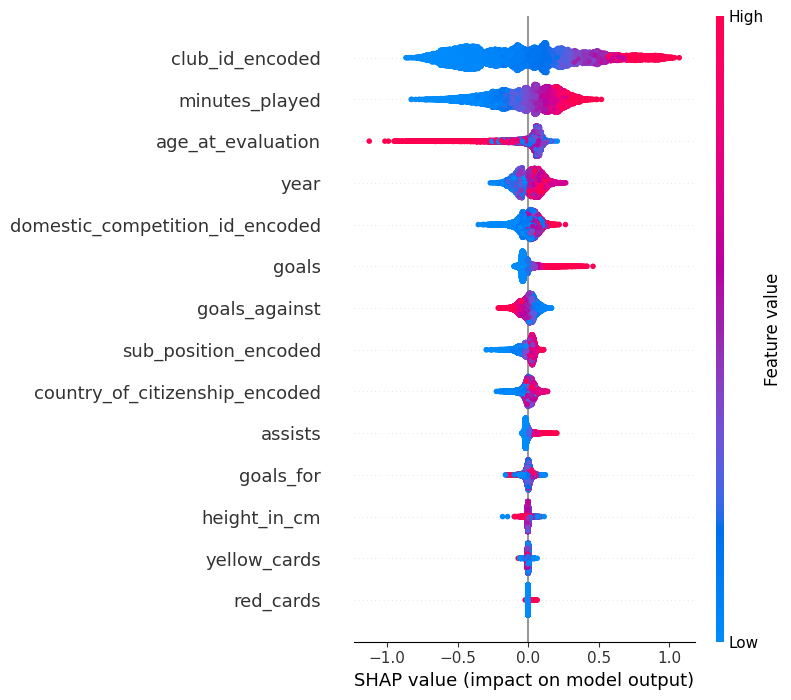

In [11]:
# Create an explainer object
explainer = shap.Explainer(model, X_train)

# Compute SHAP values for the test dataset
shap_values = explainer.shap_values(X_test)

# Plot the SHAP values
shap.summary_plot(shap_values, X_test)

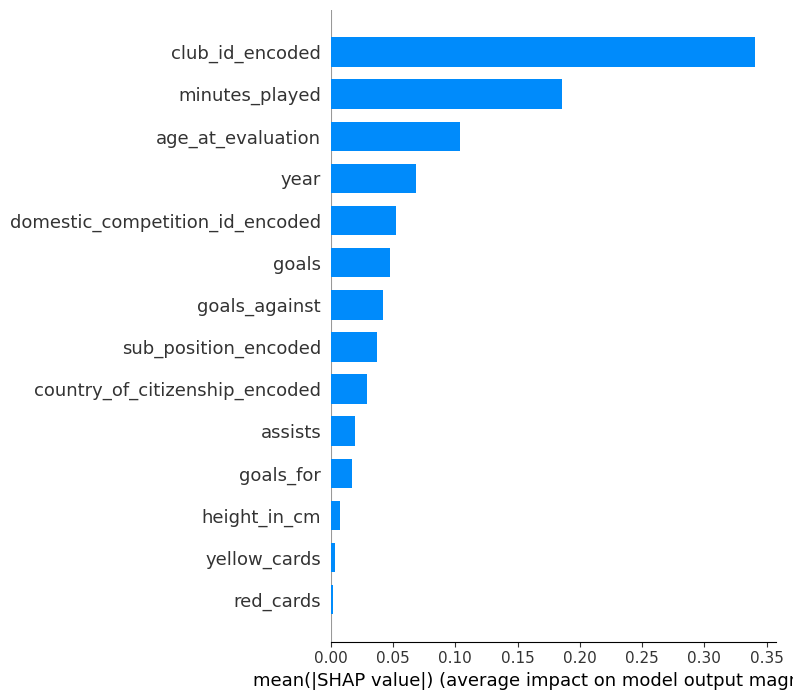

In [12]:
shap.summary_plot(shap_values, X_test, plot_type="bar")


In [5]:
shap_values

array([[-1.00818766e-02,  5.73015730e-02,  8.30065092e-05, ...,
         2.52776932e-02,  2.23093637e-01,  3.31803686e-02],
       [-5.00923430e-03,  3.78443326e-02,  8.30065092e-05, ...,
         3.05668983e-02, -5.86419258e-01, -5.26023540e-02],
       [-4.37515401e-03, -1.07014822e-03,  1.74313669e-03, ...,
         3.70131496e-03, -3.77321104e-01, -2.21746235e-02],
       ...,
       [-4.37515401e-03, -6.91704897e-02,  4.51002033e-03, ...,
        -6.68193151e-03, -3.70698742e-01, -1.73103941e-02],
       [-3.10699343e-03,  2.81157124e-02,  6.17015052e-03, ...,
         2.00294179e-02,  1.77566621e-01,  3.31803686e-02],
       [ 6.97488321e-04, -8.86277301e-02, -5.45076077e-03, ...,
         8.00427497e-03, -1.42085175e-01, -3.74820083e-02]])

In [11]:
shap.plots.bar(shap_values)

NameError: name 'x' is not defined

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=039d1f4a-fb47-4bbf-8592-3573ff918cac' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>